**Mall-Customers**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

In [16]:
df = pd.read_csv('dataset/Mall_Customers.csV')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
x = df.iloc[:, [3, 4]].values  

In [18]:
x.shape

(200, 2)

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


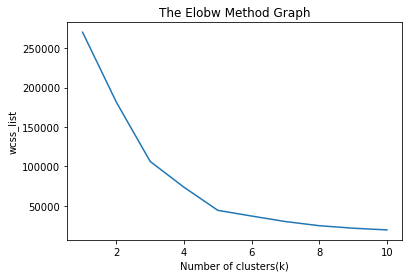

In [19]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [20]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

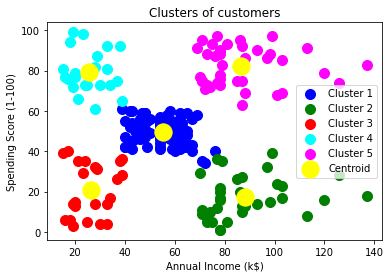

In [21]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

**iris**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

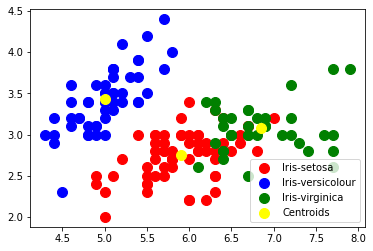

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv('dataset/iris.csv')
df.head(10)
x = df.iloc[:, [0,1,2,3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# #Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


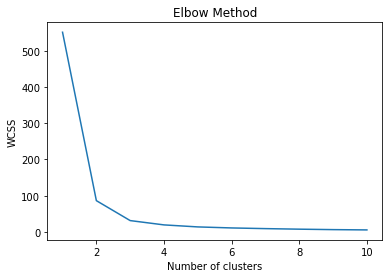

In [24]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**mnist**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

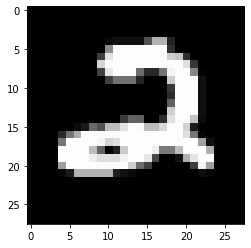

In [26]:
# Load the data from the file
mnist_data = pd.read_csv("dataset/mnist_data.csv")
# Plotting the first image in the data
im = np.asarray(mnist_data.iloc[0:1,:]).reshape(28,28)
plt.imshow(im,cmap=plt.cm.gray)


In [27]:
from sklearn.cluster import KMeans
# building K-Means model with 10 clusters
model = KMeans(n_clusters=10)
model.fit(mnist_data)
# Take a look at the cluster labels that are generated
# Note that these cluster labels do not indicate the digit in the images
print(np.unique(model.labels_))
#output
#[0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]


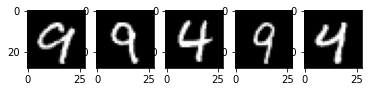

In [28]:
# Explore images in cluster 1
# cluster1 variable holds the data that has been grouped into the first cluster
cluster1 = mnist_data[model.labels_==0]
# Pick 5 random images from cluster 1
cluster1_imgs = cluster1.iloc[[np.random.randint(0,cluster1.shape[0]) for i in range(0,5)]]
# Plot the images in cluster 1
for i in range(0,cluster1_imgs.shape[0]):
    plt.subplot(1,5,i+1)
    img_fig = np.asarray(cluster1_imgs[i:i+1]).reshape(28,28)
    plt.imshow(img_fig,cmap=plt.cm.gray)

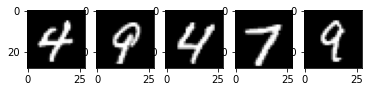

In [30]:
# Explore images in cluster 2
cluster2 = mnist_data[model.labels_==1]
cluster2_imgs = cluster2.iloc[[np.random.randint(0,cluster2.shape[0]) for i in range(0,5)]]
for i in range(0,cluster2_imgs.shape[0]):
    plt.subplot(1,5,i+1)
    img_fig = np.asarray(cluster2_imgs[i:i+1]).reshape(28,28)
    plt.imshow(img_fig,cmap=plt.cm.gray)